***The rule-based approach was simple but didn't account for more complex constraints. In this iteration, we use K-Means clustering to group users by location and apply additional constraints (e.g., timing) to improve matching accuracy.***



---



# **`Importing Libraries`**

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# **`Reading Data`**

In [3]:
riders = pd.DataFrame({
    'rider_id': [1, 2, 3],
    'pickup_location': [(10, 10), (20, 20), (15, 15)],
    'dropoff_location': [(50, 50), (60, 60), (55, 55)],
    'pickup_time': ['08:00', '09:00', '10:00']
})

passengers = pd.DataFrame({
    'passenger_id': [101, 102, 103],
    'pickup_location': [(12, 12), (25, 25), (14, 14)],
    'dropoff_location': [(52, 52), (65, 65), (54, 54)],
    'preferred_time': ['08:15', '09:15', '10:10']
})

# **`Applying K-means clustering`**

In [4]:
# Convert locations to numpy arrays
locations = np.concatenate([riders['pickup_location'].tolist(), passengers['pickup_location'].tolist()])

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(locations)
riders['cluster'] = kmeans.labels_[:len(riders)]
passengers['cluster'] = kmeans.labels_[len(riders):]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# **`Visualizing clusters`**

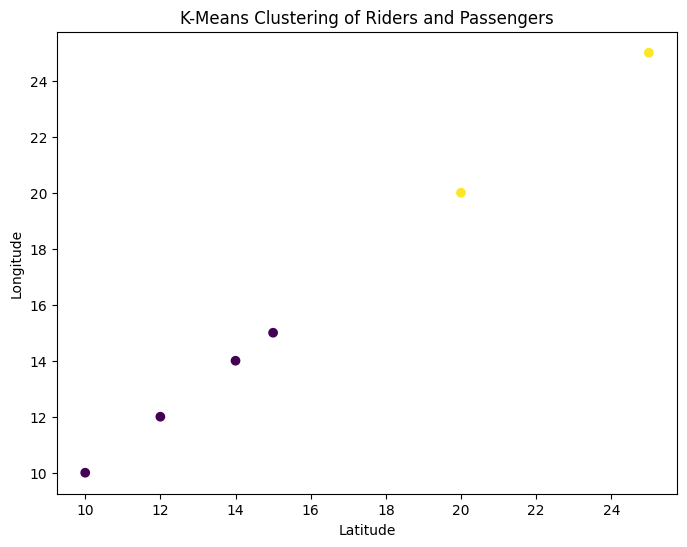

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(locations[:, 0], locations[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering of Riders and Passengers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# **`Constraint-Based Matching Function`**

In [8]:
def constraint_based_match(riders, passengers, time_diff=15):
    matches = []
    for _, rider in riders.iterrows():
        for _, passenger in passengers.iterrows():
            if rider['cluster'] == passenger['cluster']:
                rider_time = pd.to_datetime(rider['pickup_time'])
                passenger_time = pd.to_datetime(passenger['preferred_time'])
                time_difference = abs((rider_time - passenger_time).total_seconds() / 60)
                if time_difference <= time_diff:
                    matches.append((rider['rider_id'], passenger['passenger_id']))
    return matches

In [9]:
matches_2 = constraint_based_match(riders, passengers)
print("Iteration 2 - K-Means with Constraints Matches:", matches_2)

Iteration 2 - K-Means with Constraints Matches: [(1, 101), (2, 102), (3, 103)]


# **`Solution`**

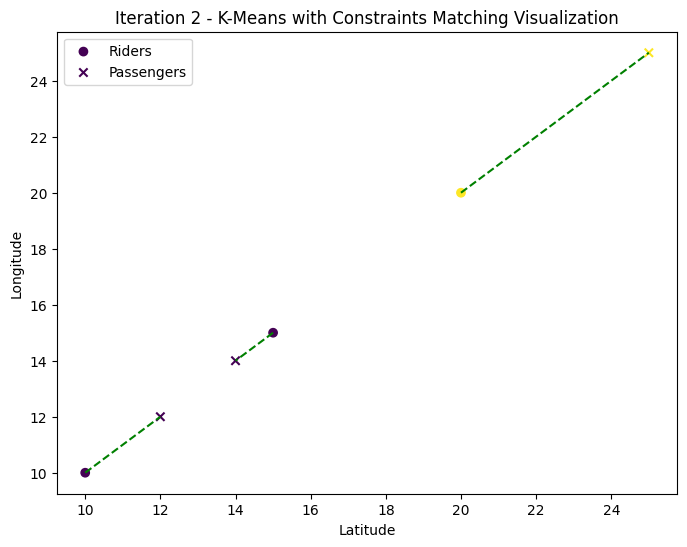

In [10]:
# Visualizing K-Means with Constraints Matches
plt.figure(figsize=(8, 6))

# Plotting pickup locations with clusters
plt.scatter(riders['pickup_location'].apply(lambda x: x[0]),
            riders['pickup_location'].apply(lambda x: x[1]),
            c=riders['cluster'], cmap='viridis', label='Riders')

plt.scatter(passengers['pickup_location'].apply(lambda x: x[0]),
            passengers['pickup_location'].apply(lambda x: x[1]),
            c=passengers['cluster'], cmap='viridis', marker='x', label='Passengers')

# Plotting lines between matched pairs
for rider_id, passenger_id in matches_2:
    rider_loc = riders.loc[riders['rider_id'] == rider_id, 'pickup_location'].values[0]
    passenger_loc = passengers.loc[passengers['passenger_id'] == passenger_id, 'pickup_location'].values[0]
    plt.plot([rider_loc[0], passenger_loc[0]], [rider_loc[1], passenger_loc[1]], color='green', linestyle='--')

plt.legend()
plt.title('Iteration 2 - K-Means with Constraints Matching Visualization')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()